**1. Python**

In [1]:
class MoneyBox:
    def __init__(self, capacity):
        self.capacity = capacity
        self.coins = 0


    def can_add(self, v):
        if v + self.coins <= self.capacity:
            return True
        else:
            return False

    def add(self, v):
        if self.can_add(v) == True:
            self.coins += v
            print(v, "coins added.")
        else:
            print("Can't add those many coins!")


In [2]:
mb = MoneyBox(10)

In [3]:
mb.add(10)
mb.add(2)

10 coins added.
Can't add those many coins!


**2. SQL**
```
SELECT m.first_name AS "Manager First Name", 
       m.last_name  AS "Manager Last Name", 
       e.first_name AS "Employee First Name", 
       e.last_name  AS "Employee Last Name" 
FROM   table_1 AS t 
       LEFT JOIN manager AS m 
               ON m.id_manager = t.id_manager 
       LEFT JOIN employee AS e 
               ON e.id_employee = t.id_employee 
WHERE  Date(dt_work_from) >= '2020-01-01' 
       AND Date(dt_work_to) <= '2020-01-31'
```

**3. Pandas**

In [53]:
import pandas as pd
import numpy as np

A

In [54]:
df = pd.DataFrame({'days': [1, 1, 2, 2, 1, 3, 4],
                   'values': [10, 10, 5, 3, -2, 4, 20]})

In [55]:
df.groupby('days')['values'].agg(['mean', 'median', 'max', 'min'])

mean  median  max  min
days                        
1        6      10   10   -2
2        4       4    5    3
3        4       4    4    4
4       20      20   20   20

B

In [56]:
df = pd.DataFrame({'employee': [1001, 1002, 1004, 1001, 1001, 1002, 1004, 1005, 1005],
                       'pos': [2, 2, 2, 2, 2, 2, 2, 2, 2],
                       'amount': [125, 542, 2345, 892, 100, 1234, 657, 34, 35]})

In [57]:
result = df.groupby(['employee','pos'])['amount'].agg(['max', 'min'])

In [58]:
result = result.reset_index()
result['diff'] = result['max'] - result['min']
result.sort_values('diff', ascending=False, inplace=True)
result.head()

employee  pos   max  min  diff
2      1004    2  2345  657  1688
0      1001    2   892  100   792
1      1002    2  1234  542   692
3      1005    2    35   34     1

In [59]:
result[['employee', 'pos', 'diff']][:2]

employee  pos  diff
2      1004    2  1688
0      1001    2   792

**4. ML**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import itertools

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

**Analyzing the CSV**

In [86]:
df = pd.read_csv('test_restaurant.csv')
df.head()

date  num_visitors
0  2000-01-01     49.128490
1  2000-01-02     50.288060
2  2000-01-03     53.549213
3  2000-01-04     45.453240
4  2000-01-05     49.469402

In [87]:
df['date']

0       2000-01-01
1       2000-01-02
2       2000-01-03
3       2000-01-04
4       2000-01-05
           ...    
3646    2009-12-25
3647    2009-12-26
3648    2009-12-27
3649    2009-12-28
3650    2009-12-29
Name: date, Length: 3651, dtype: object

In [88]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [89]:
df['date'].min(), df['date'].max()

(Timestamp('2000-01-01 00:00:00'), Timestamp('2009-12-29 00:00:00'))

In [90]:
df.isnull().sum()

date            0
num_visitors    0
dtype: int64

In [91]:
df.tail()

date  num_visitors
3646 2009-12-25     31.124632
3647 2009-12-26     27.293856
3648 2009-12-27     30.218498
3649 2009-12-28     24.751186
3650 2009-12-29     66.118840

**Bin the Dataframe into months(Taking mean) and Plot**

In [92]:
df = df.set_index('date')
y = df['num_visitors'].resample('MS').mean()

In [93]:
y['2009':]

date
2009-01-01    47.911468
2009-02-01    47.227063
2009-03-01    39.160543
2009-04-01    32.710560
2009-05-01    29.729066
2009-06-01    28.218713
2009-07-01    27.704555
2009-08-01    28.178865
2009-09-01    27.928319
2009-10-01    27.891703
2009-11-01    28.175850
2009-12-01    30.818450
Freq: MS, Name: num_visitors, dtype: float64

In [94]:
y.plot(figsize=(15, 6))
plt.show()

**Decomposing the data into trend, seasonality, and noise**

In [95]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Thus, we see that the data has seasonality - It starts high every year and then decreases gradually. It also has a general upward trend.

**Forecasting with Autoregressive Integrated Moving Average(ARIMA)**

We set values for p, d and q, which account for seasonality, trend, and noise respectively in data. 

In [96]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


We try to find the optimal set of parameters(p,d,q) that yields the best performance of our model.

In [97]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1118.5790122313226
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:904.7505501755543
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:455.3309976790819
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:357.9525625100741
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:331.06586939416763
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:327.06712952831754
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:321.2335178989045
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:263.85146558429966
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:987.0368108887559
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:785.263683819591
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:391.8530188724568
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:331.43257861415594
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:324.63401872311425
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:319.0685211408545
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.6681584568087
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:262.77359109411185
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:786.8699052420452
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:602.1004104925067
ARIM

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:264.8513162669969
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:218.75707888235587
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:211.7010211424104
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:793.4195139269734
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:608.2448802438403
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:320.57376209126727
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:271.7280992682166
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:321.2658284908104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:318.3716171073418
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:272.4394336819083
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:264.85715257593677
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:786.438392313186
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:603.4719321331614
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:265.91933343042126
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:212.87642789548275
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:270.18307924895095
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:242.48690598623233
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:220.74001703069973
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:215.2936379618994
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:787.2873782301856
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:602.1846682363954
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:294.5381824917184
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:235.99726808383795
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:294.5396983198416


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:297.66154079703745
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:247.53983735624888
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:243.2253331030083
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:781.8578636828788
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:598.3504504433664
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:263.64058783898423
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:211.4652279485663
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:265.7066959866407


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:267.42191829595646
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:218.204170984741
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:213.69104244244403


Thus, SARIMAX(1, 1, 1)x(1, 1, 1, 12) are the optimal values, since they have lowest AIC score.
We now fit the model with these values

In [98]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

**Compare forecast on real data.**

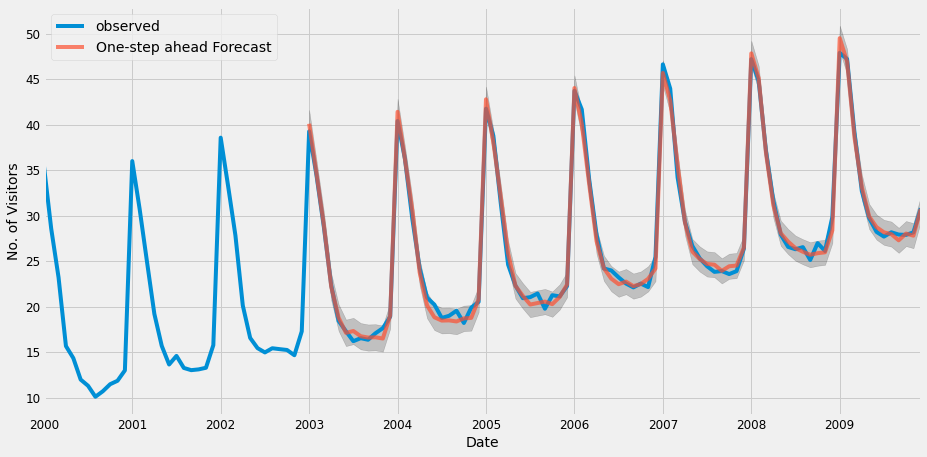

In [99]:
pred = results.get_prediction(start=pd.to_datetime('2003-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of Visitors')
plt.legend()
plt.show()

Our predictions almost completely align with actual number of visitors. 

In [100]:
y_forecasted = pred.predicted_mean
y_truth = y['2003-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.5


Our MSE is also very low, which is a good sign.
We now use our model to forecast values for 2 years, hence we use 24 steps.

In [101]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [102]:
pred_ci

lower num_visitors  upper num_visitors
2010-01-01           49.249796           52.002787
2010-02-01           47.425277           50.178047
2010-03-01           39.309001           42.061776
2010-04-01           33.462347           36.215121
2010-05-01           30.245361           32.998136
2010-06-01           28.914699           31.667473
2010-07-01           28.421291           31.174066
2010-08-01           28.561714           31.314488
2010-09-01           27.924629           30.677404
2010-10-01           28.551853           31.304627
2010-11-01           28.411784           31.164559
2010-12-01           31.368477           34.121251
2011-01-01           50.804754           53.769559
2011-02-01           49.172268           52.136903
2011-03-01           41.064394           44.029031
2011-04-01           35.115923           38.080560
2011-05-01           31.938679           34.903316
2011-06-01           30.577692           33.542329
2011-07-01           30.080783           33.045420
2011-08-01           30.277551           33.242189
2011-09-01           29.705698           32.670336
2011-10-01           30.220893           33.185531
2011-11-01           30.152415           33.117052
2011-12-01           33.056102           36.020739

In [103]:
pred_ci.iloc[0]

lower num_visitors    49.249796
upper num_visitors    52.002787
Name: 2010-01-01 00:00:00, dtype: float64

Thus, we predict the number the number of visitors on 2010-01-01 to be between 49 and 52.